## **DS05 - Data Science with Python - Linear Model Regression**

In this workshop, we introduce the **Linear Model Regression**. We will go over the concept to understand the underlying theory and create a piece of code for analysing a set of data. In the first part of the workshop, we will use ````Simple Linear Regression````, whereas in the second part we will use ````Multiple Linear Regression````.


### What is Linear Regression?

Linear Regression is a statistical method used for modeling the dependence between two quantities, allowing us to predict behaviour at points where we don't have any data.

To start with, we will do a linear fit. This means the model we will be fitting our data to is just a straight line.

So, for a set of data points: $(x_i, y_i)$, we can write the equation of the line as:
$$y_l(x) = mx_i + c$$ 
where $y_l$ is the predicted y-value, not the actual y-values of our points.

The gradient - **m** and y-intercept - **c** are called fit parameters. By using the method of linear regression (also called the method of least squares fitting), we can calculate the values for the two parameters and plot our line of best fit.

For implementing the least squares fit equations into our code, we will have to calculate the slope and intercept of the line of best fit. For this, we will use the following formulas: 
$$ m = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})} $$

$$ c = \bar{y} - m \bar{x} $$

where $ \bar{x} $ and $ \bar{y} $ represent the mean values of the data that we will calculate as ````mean_x````, respectively ````mean_y````.

Now, let's have a look at something more practical and start writing some code.
The first thing we need to do is import our necessary libraries.

**!** Run the following code cell, to ensure you have the Sci-Kit Learn installed (we will use it later in the workshop). 

In [1]:
!pip install sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

### The Problem
Below there are two code cells to extract a set of data and then plot it. The first code cell generates a data frame by reading the csv file "RegressionData.csv". Plotting the two arrays reveals a set of data that seems to show some kind of relationship between ````x```` and ````y````. The data here seems to change linearly as ````x```` changes. We can model this using a linear fit.


In [3]:
# Generates data frame from csv file
df = pd.read_csv("RegressionData.csv")

# Turning the columns into arrays
x = df["x"].values
y = df["y"].values

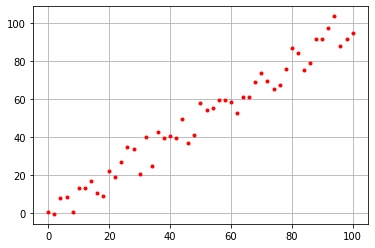

In [4]:
# Plots the graph from the above data
plt.figure()
plt.grid(True)
plt.plot(x,y,'r.')

#### Calculating the gradient and y-intercept.

In [5]:
# calculating the means of the x and y data
mean_x = np.mean(x) 
mean_y = np.mean(y)

# calculating the slope
slope = np.sum((y - mean_y)*x) / np.sum((x - mean_x)*x) 
print ("Gradient:", slope)

# calculating the intercept
intercept = mean_y - slope*mean_x 
print ("Intercept", intercept)

Gradient: 0.9773554490236189
Intercept 0.3332342707666953


#### Plotting the line of best fit on top of our data

(-10, 110)

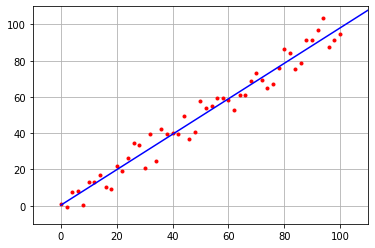

In [6]:
x_max = max(x)
plt.figure("") # start a new figure
plt.grid(True) # add a grid
# generate two points for the fitted line
x_points = np.linspace(0,x_max*2.,2) 
y_points = slope*x_points + intercept
plt.plot(x, y,'r.') # plotting data as points
plt.line = plt.plot(x_points, y_points, 'b-') #plotting the line of best fit
# setting limits for the axes
plt.xlim(-10,110) 
plt.ylim(-10,110)

### Sci-kit Learn

A more efficient way we could do this, is by using Python's Sci-kit Learn library.

The algorithms we will use today from Sci-Kit Learn are designed to determine the values of $m$ and $c$ so that a line of best fit may be found.


### Preprocessing the data

First of all, we need to prepare our data, which is called reshaping. At the moment, our data is in the shape of a single row, with no columns. This current shape is not helpful for us as the Sci-Kit Learn deals with columns. So, we will use the ````np.reshape(x,(-1,1))```` function to reshape it.

It is also worth noting that we typically use a capital ````X```` to denote our features or independent variables and again, we use ````y```` for our dependent variable or label. However, this is an optional step depending on how your data is formatted. For instance, if your ````X```` is a data frame with multiple columns, you won't need to convert it into an array. Anything with one column likely needs to be converted to an array and be reshaped as demonstrated below.

##### Visualising the shape of our data

In [7]:
# Original shape of x and y
print(x)
print(y)

[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100.]
[  0.65591658  -0.5482752    7.63253391   8.19598614   0.53744705
  13.0218931   13.26871136  16.70618777  10.31111803   8.97678547
  21.78688936  19.03096869  26.52686536  34.67511388  33.55368481
  20.71044441  39.71977804  24.64446733  42.47503722  39.45011526
  40.31951772  39.62612559  49.24208696  36.98153367  40.93415442
  57.87415451  53.97155638  55.27096672  59.31954904  59.49690638
  58.21257686  52.69694868  60.886796    60.97044952  68.9296652
  73.41489439  69.32916719  65.11032816  67.02613088  75.93690024
  86.61596394  84.0352415   75.22931319  78.92167603  91.64027473
  91.59972973  97.07813901 103.44848082  87.71868424  91.24425745
  94.83750507]


##### Reshaping the data

In [11]:
# Independant variable or features
X = x.reshape(-1,1)

# Dependant variable or labels
y = y.reshape(-1,1)

# Reshaped X and y
print(X)
print(y)

[[  0.]
 [  2.]
 [  4.]
 [  6.]
 [  8.]
 [ 10.]
 [ 12.]
 [ 14.]
 [ 16.]
 [ 18.]
 [ 20.]
 [ 22.]
 [ 24.]
 [ 26.]
 [ 28.]
 [ 30.]
 [ 32.]
 [ 34.]
 [ 36.]
 [ 38.]
 [ 40.]
 [ 42.]
 [ 44.]
 [ 46.]
 [ 48.]
 [ 50.]
 [ 52.]
 [ 54.]
 [ 56.]
 [ 58.]
 [ 60.]
 [ 62.]
 [ 64.]
 [ 66.]
 [ 68.]
 [ 70.]
 [ 72.]
 [ 74.]
 [ 76.]
 [ 78.]
 [ 80.]
 [ 82.]
 [ 84.]
 [ 86.]
 [ 88.]
 [ 90.]
 [ 92.]
 [ 94.]
 [ 96.]
 [ 98.]
 [100.]]
[[  0.65591658]
 [ -0.5482752 ]
 [  7.63253391]
 [  8.19598614]
 [  0.53744705]
 [ 13.0218931 ]
 [ 13.26871136]
 [ 16.70618777]
 [ 10.31111803]
 [  8.97678547]
 [ 21.78688936]
 [ 19.03096869]
 [ 26.52686536]
 [ 34.67511388]
 [ 33.55368481]
 [ 20.71044441]
 [ 39.71977804]
 [ 24.64446733]
 [ 42.47503722]
 [ 39.45011526]
 [ 40.31951772]
 [ 39.62612559]
 [ 49.24208696]
 [ 36.98153367]
 [ 40.93415442]
 [ 57.87415451]
 [ 53.97155638]
 [ 55.27096672]
 [ 59.31954904]
 [ 59.49690638]
 [ 58.21257686]
 [ 52.69694868]
 [ 60.886796  ]
 [ 60.97044952]
 [ 68.9296652 ]
 [ 73.41489439]
 [ 69.32916719]

#### Seperating into Training and Test Sets
Here we split our data into training sets and test sets for each variable using the ````train_test_split```` function. The input is represented by the two variables and an additional argument - the ratio at which the data is split. Here we passed ````test_size = 0.2```` so $20\%$ of the data is allocated to the test set while $80\%$ is allocated to the training set.

In [12]:
# Seperates the data into test and training sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

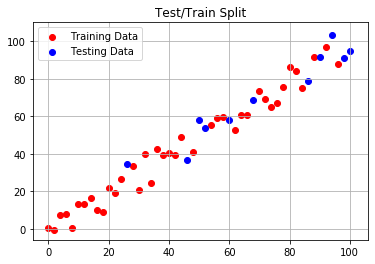

In [13]:
# Plotting the training and testing splits
plt.scatter(X_train, y_train, label = "Training Data", color = 'r')
plt.scatter(X_test, y_test, label = "Testing Data", color = 'b')
plt.legend()
plt.grid("True")
plt.title("Test/Train Split")
plt.show()

### Training the Regressor
We begin by defining a ````regressor```` variable by calling the ````LinearRegression```` function. Then, we pass ````regressor.fit(X_train, y_train)````. This passes our training data into the regressor in order to train it. For the linear regression algorithm, training it means finding the values of $m$ and $c$ from the equation for the line of best fit.

In [14]:
# Defining our regressor
regressor = LinearRegression()

# Train the regressor
fit = regressor.fit(X_train, y_train)

#### Returning the Gradient and the Intercept
Having trained the regressor we can now return the values of the gradient and intercept. These are simply the attributes ````.coef_```` and ````.intercept_```` of the variable we have used to define our trained regressor. In our case we defined it as ````fit````.

In [15]:
# Returns gradient and intercept
print("Gradient:",fit.coef_)
print("Intercept:",fit.intercept_)

Gradient: [[0.97828872]]
Intercept: [-0.06997086]


### Line of Best Fit Values
Now that we've trained our regressor, we can obtain the values for the line of best fit. We do this by passing through a set of points into ````regressor.predict````. For each point, the regressor predicts a value based on the line of best fit that was obtained. Essentially, the input is passed through the equation: $ y = mx + c $, where the values of $m$ and $c$ are given by ````fit.coef_```` and ````fit.intercept_```` respectively. The code cell below uses the ````regressor.predict```` to obtain a predicted set of values. Then, we obtain another set of values by explicitly substituting in the formula for our line of best fit. We subtract the two sets away from one another to demonstrate that the ````regressor.predict```` function did indeed do the same thing.

In [16]:
# Predicted values 
y_pred = regressor.predict(X_test)

# y = m*x + c
best_fit_line = fit.coef_*X_test + fit.intercept_

# Comparing the two
y_pred - best_fit_line

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Plotting the Line of Best Fit
Below, we plot the line of best fit against the original data. Doing this enables us to make predictions about what ````y```` value we'd obtain for a ````x```` value within the interval covered, but not actually recorded in the data set. This is known as interpolation. Our line in effect is a prediction of what the value of ````y```` is as ````x```` changes.

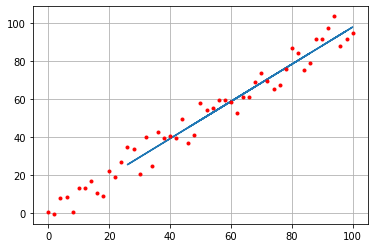

In [17]:
# Plot of the data with the line of best fit
plt.plot(X_test,y_pred)
plt.plot(x,y,'r.')
plt.grid(True)

### Scoring the Model
Let us compare the predicted results with the actual values by putting them into a data frame. Note the need for the slicing occurs because ````pd.DataFrame```` takes arrays as rows rather than columns. Since we converted the arrays to columns at the start we need to undo this to convert to a data frame.

In [18]:
# Converts predicted values and test values to a data frame
df = pd.DataFrame({"Predicted": y_pred[:,0], "Actual": y_test[:,0]})
df

,Predicted,Actual
0,91.889169,103.448481
1,97.758901,94.837505
2,25.365536,34.675114
3,50.801043,53.971556
4,66.453662,68.929665
5,44.931310,36.981534
6,84.062859,78.921676
7,48.844465,57.874155
8,58.627353,58.212577
9,95.802324,91.244257


We can provide a score of our model by passing ````regressor.score(X_test,y_test)````. This is data that our regressor hasn't seen yet, which means it can provide a basis with which to test the results. The best score you can obtain for the model is $1$. The lower the score, the worse a fit the model is to the data.

In [19]:
# Determines a score for our model
score = regressor.score(X_test, y_test)
print(score)

0.9198164613886793


### Multiple Linear Regression
The example used above involved only two variables. However, in the real world it is highly unlikely that a label or dependant variable would depend on only one feature or independant variable. The equation for the value of $y$ in such an instance can be generalised as follows:
$$ y = c + m_1 x_1 + m_2 x_2 + ... m_n x_n + \epsilon $$
The equation is similar to the one before except we have multiple values for the gradient and we also have an additional $\epsilon$ term which is the error. In essence, the $\epsilon$ accounts for any potential data points that might not be a fit for the linear model.

Below, we will have a look at an example on how a linear regression problem with multiple features works. The dataset in question is about different types of advertising and their effect on sales. The independent variables are given by the "TV", "Radio" and "Newspaper" columns while "Sales" is our dependent variable.

In [22]:
# Converts advertising csv to a data frame
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


The process for applying the linear regression algorithm when you have multiple independent variables is very similar to that for our original case. The key difference being that ````X```` will consist of more than one column, so converting to a Numpy array and reshaping it is not required. Once we have ````X```` and ````y````, the procedure for splitting the data into training and test sets then training the regressor and so forth is the same as before.

In [24]:
# Independent variables
X = df.drop("Sales",axis=1)

# Dependent variable
y = df["Sales"].values.reshape(-1,1)

# Splitting into test and training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [25]:
# Defining regressor
regressor = LinearRegression()

# Training our regressor
fit = regressor.fit(X_train,y_train)

# Predicting values
y_pred = fit.predict(X_test)

# Scoring our regressor
fit.score(X_test,y_test)


0.9088290464799544

In [26]:
# Comparing predicted against actual values
df = pd.DataFrame({"Predicted": y_pred[:,0], "Actual": y_test[:,0]})
df

,Predicted,Actual
0,18.056886,18.4
1,11.423908,10.4
2,10.968099,11.3
3,9.403303,7.3
4,9.952576,10.1
5,9.862802,9.2
6,21.323071,19.8
7,17.650101,16.9
8,16.985160,17.2
9,9.418152,6.6
